### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

##### GRIP-NOV 2021

#### AUTHOR- NAMRATA RAUT

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### visualizing the data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

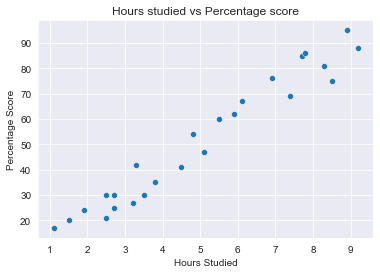

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Hours studied vs Percentage score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### from above graph, we can see that a positive linear relation between the hours studied and the percentage obtained

#### Training the Model

##### 1. Preparing the data

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [12]:
# the next step is to split this data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0 )

#### 2.Working on the data with the model

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


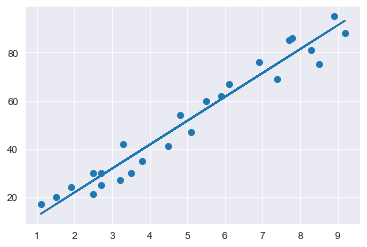

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

####  Predicting the percentage score

In [15]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing the result with actual data

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### You can also test with your own data

In [18]:
hours = [9.25]
own_pred = regressor.predict([hours])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737535


#### Evaluating the model (accuracy)

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
